In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/dd/57/8fd38e31be7951f9164f4cb3a769159a0c2ef4af0f597ddf09a7e736593e/wordcloud-1.5.0-cp36-cp36m-win_amd64.whl


You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<br>
<br>

# 단순 워드 클라우드

In [2]:
# 단어 설정
text = "Nyan"

# 0~299까지의 숫자가 입력된 2차원 배열 생성
x, y = np.ogrid[:300, :300]

In [3]:
# 마스크 생성
# ** : 거듭제곱
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

In [4]:
# 전체 마스크
mask


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [5]:
# 앞부분 행의 마스크
mask[50]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
# 중간 행의 마스크
mask[150]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
# 뒷부분 행의 마스크
mask[250]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

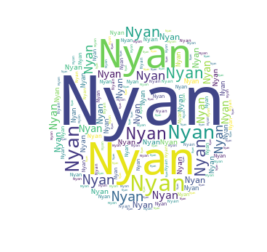

In [8]:
# 워드 클라우드 생성
# repeat=True : 같은 단어를 반복
# mask : 마스크 형태에 따라 단어 배치
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

# 이미지 출력
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


<br>
<br>

# 텍스트에서 워드 클라우드 생성

In [9]:
# 현재 디렉토리 구함
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# 텍스트 로드
text = open(path.join(d, 'starwars.txt')).read()



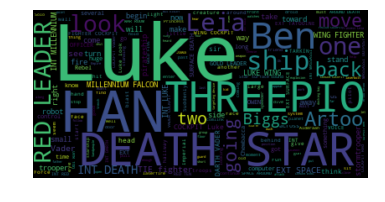

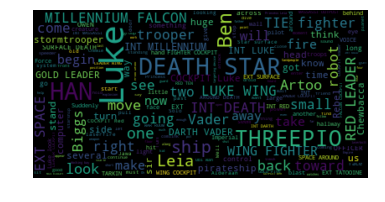

In [10]:
# 워드 클라우드 생성
wc = WordCloud().generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# 최대 폰트 크기 설정
wc = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


<br>
<br>

# 마스크 워드 클라우드

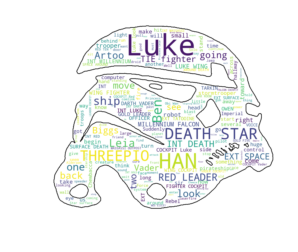

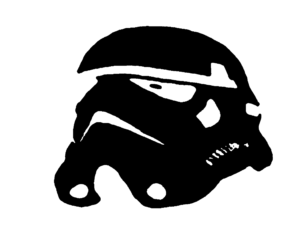

In [11]:
# 마스크 이미지 로드
mask = np.array(Image.open(path.join(d, "starwars_mask.png")))

# 워드 클라우드 설정
# contour_width : 윤곽선 두께
# contour_color : 윤곽선 색
wc = WordCloud(background_color="white", mask=mask, 
               contour_width=3, contour_color='black')

# 워드 클라우드 생성
wc.generate(text)

# 파일로 저장
wc.to_file(path.join(d, "starwars.png"))

# 이미지 표시
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


<br>
<br>

# 앨리스 예제

In [12]:
# 텍스트 로드
text = open(path.join(d, 'alice.txt')).read()


In [13]:
# 마스크 이미지 로드
mask = np.array(Image.open(path.join(d, "alice_mask.png")))

# 워드 클라우드 내장 불용어
stopwords = set(STOPWORDS)
stopwords.add("said")


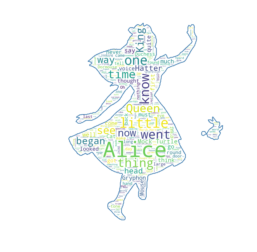

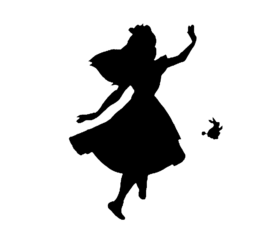

In [14]:
# 워드 클라우드 설정
wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# 워드 클라우드 생성
wc.generate(text)

# 파일로 저장
wc.to_file(path.join(d, "alice.png"))

# 이미지 표시
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


<br>
<br>

# 웹 크롤링 후 워드 클라우드 생성

In [15]:
import requests
import re
from bs4 import BeautifulSoup

# 방탄소년단 위키
base_url = 'https://namu.wiki/w/%EC%97%90%EB%B2%84%EA%B8%80%EB%A1%9C%EC%9A%B0'

# 웹페이지를 가져옴
req = requests.get(base_url)
html = req.content



In [16]:
# HTML 태그를 제거
text = BeautifulSoup(html, "lxml").text

# 기호 제거
text = re.sub('\\n', '', text)
text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', '', text)



In [17]:
from konlpy.tag import Okt

# 형태소분석기로 명사만 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(text)
# nouns[:100]


In [18]:
# 배열을 텍스트로 변환
text = " ".join(nouns)
# text


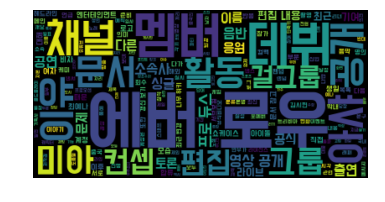

In [19]:
# 한글 폰트 경로
# font_path = path.join(d, 'BMDOHYEON_ttf.ttf')
font_path = 'C:/Users/ddongcom053/AppData/Local/Microsoft/Windows/Fonts/BMDOHYEON_ttf.ttf'

# 워드 클라우드 생성
wc = WordCloud(font_path = font_path).generate(text)

# 이미지 출력
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()
